<h1>Gráfico da Densidade de energia versus Pressão</h1>

In [1]:
#Importando módulos
import math as mt                         #funções matemáticas nativas do Python
import pandas as pd
import numpy as np                        #módulo tipo 'excel' do python
import matplotlib.pyplot as plt           #módulo para plotar gráficos

In [2]:
#CGS
c = 2.998E+10                                                                       #cm/s
me = 9.10938356E-28                                                                 #g
hbar = 1.05E-27                                                                     #erg.s
e_zero = (me*me*me*me)*(c*c*c*c*c)/(((mt.pi*mt.pi)*(hbar*hbar*hbar)))               #erg/cm³
#e_zero = 1.42E+24                                                                  #erg/cm³

print(e_zero)

1.4596423499903957e+24


In [ ]:
#SI
c = 2.998E+8                                                                #m/s
me = 9.10938356E-31                                                         #kg
hbar = 1.05E-34                                                             #J.s
e_zero = (me*me*me*me)*(c*c*c*c*c)/(((mt.pi**2)*(10**-9)*(hbar**3)))        #J/Km³
#e_zero = 1.42E+24*(10**-7)/(10**-15)                                       #J/km³

print(e_zero)

In [3]:
'''
Calculando os intervalos de kf e x(kf)

k e[0,2mec]
x = k/mec
x e[0,2]
'''
e = []                                                      #Listas vazias
P = []
n = 100                                                     #Número de pontos

kf = np.linspace(0,2*me*c,n)                                #Gerando os valores de k

x = np.empty(n)                                             #Gerando os valores de x
for i in range(n):
    x[i] = kf[i]/(me*c)
    
print('kf: \n',kf)
print('x: \n',x)

kf: 
 [0.00000000e+00 5.51715796e-19 1.10343159e-18 1.65514739e-18
 2.20686318e-18 2.75857898e-18 3.31029478e-18 3.86201057e-18
 4.41372637e-18 4.96544217e-18 5.51715796e-18 6.06887376e-18
 6.62058955e-18 7.17230535e-18 7.72402115e-18 8.27573694e-18
 8.82745274e-18 9.37916854e-18 9.93088433e-18 1.04826001e-17
 1.10343159e-17 1.15860317e-17 1.21377475e-17 1.26894633e-17
 1.32411791e-17 1.37928949e-17 1.43446107e-17 1.48963265e-17
 1.54480423e-17 1.59997581e-17 1.65514739e-17 1.71031897e-17
 1.76549055e-17 1.82066213e-17 1.87583371e-17 1.93100529e-17
 1.98617687e-17 2.04134845e-17 2.09652003e-17 2.15169161e-17
 2.20686318e-17 2.26203476e-17 2.31720634e-17 2.37237792e-17
 2.42754950e-17 2.48272108e-17 2.53789266e-17 2.59306424e-17
 2.64823582e-17 2.70340740e-17 2.75857898e-17 2.81375056e-17
 2.86892214e-17 2.92409372e-17 2.97926530e-17 3.03443688e-17
 3.08960846e-17 3.14478004e-17 3.19995162e-17 3.25512320e-17
 3.31029478e-17 3.36546636e-17 3.42063794e-17 3.47580952e-17
 3.53098110e-17 3.

kf e[0,5.461986382576e-17]
x e[0,2]


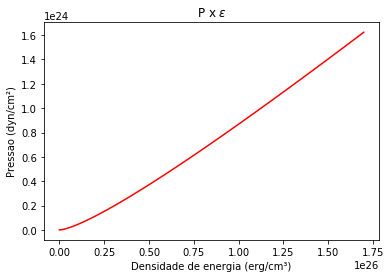

In [4]:
'''
Calculando os pontos e(x(kf)) x P(x(kf))

en = (3*e_zero)*((2*(kn**3) + kn )*((1 + kn**2))**(1/2) - np.arcsinh(kn))
Pn = (e_zero/24)*((2*(kn**3) - 3*kn)*((1 + kn**2)**(1/2)) + 3*np.arcsinh(kn))
'''

for i in range(n):
    #Calculando os pontos para cada valor de k
    e.append((e_zero*3)*((2*x[i]*x[i]*x[i] + x[i])*(np.sqrt(1 + x[i]*x[i])) - np.arcsinh(x[i])))
    P.append((e_zero/24)*((2*x[i]*x[i]*x[i] - 3*x[i])*(np.sqrt(1 + x[i]*x[i])) + 3*np.arcsinh(x[i])))

print('kf e[0,{}]'.format(2*me*c))
print('x e[0,{}]'.format(2))
#print('\nValores de k\n',k)
#print('\nValores de x\n',x)    
#print('\nValores da densidade de energia\n',e)
#print('\nValores da pressão\n',P) 
    
e_array = np.array(e)                                      #Convertendo lista em df pandas
df_e = pd.DataFrame(e_array)                               #Convertendo df pandas em np.array
df_e.to_csv('e.csv', index = False)                        #Convertento df pandas em .csv

P_array = np.array(P)                                 
df_P = pd.DataFrame(P_array)                          
df_P.to_csv('P1.csv', index = False)                  

eP = pd.concat([df_e,df_P], axis=1)                        #Concatenando os dois arrays
eP.to_csv('eP.csv', index=False)

#Plotando e personalizando o gráfico
plt.plot(e, P, color = 'red')
plt.title(r'P x $\epsilon$')
plt.xlabel('Densidade de energia (erg/cm³)')
plt.ylabel('Pressao (dyn/cm²)')
plt.savefig('pxe.png')
plt.show()

In [ ]:
# SI -> kf = 5.461986382576e-22  (kg.m/s)        -----------     1e-22*1e-3*1e-2 = 1e-5

# CGS -> kf = 5.461986382576e-17 (g.cm/s)        -----------     
